In [1]:
#Run if you need the FIPS (Federal Information Processing Series) code

#open file
file = open('FIPS.txt', 'r')

#read file
FIPS = file.read()

#print file
print(FIPS)

FIPS|STATE
  01|Alabama
  02|Alaska
  04|Arizona
  05|Arkansas
  06|California
  08|Colorado
  09|Connecticut
  10|Delaware
  11|District of Columbia
  12|Florida
  13|Georgia
  15|Hawaii
  16|Idaho
  17|Illinois
  18|Indiana
  19|Iowa
  20|Kansas
  21|Kentucky
  22|Louisiana
  23|Maine
  24|Maryland
  25|Massachusetts
  26|Michigan
  27|Minnesota
  28|Mississippi
  29|Missouri
  30|Montana
  31|Nebraska
  32|Nevada
  33|New Hampshire
  34|New Jersey
  35|New Mexico
  36|New York
  37|North Carolina
  38|North Dakota
  39|Ohio
  40|Oklahoma
  41|Oregon
  42|Pennsylvania
  44|Rhode Island
  45|South Carolina
  46|South Dakota
  47|Tennessee
  48|Texas
  49|Utah
  50|Vermont
  51|Virginia
  53|Washington
  54|West Virginia
  55|Wisconsin
  56|Wyoming
  60|American Samoa
  66|Guam
  69|Northern Mariana Islands
  72|Puerto Rico
  74|US Minor Outlying Islands
  78|US Virgin Islands


Enter an FIPS code:56
Done
Done
Done
Done
Done
Done
Done
Downloads Finished


C:\Users\ryanj\AppData\Local\conda\conda\envs\final\lib\site-packages\ipykernel_launcher.py:87: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\ryanj\AppData\Local\conda\conda\envs\final\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


Join Complete
.prj Created
Downloaded Files Deleted
Shapefile saved in: states/FIPS


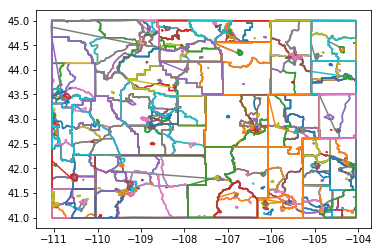

In [1]:
import geopandas as gpd
import requests
import zipfile
import io
import shapefile
import glob
import sys
import pandas
import folium
import os
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

FIPS = input('Enter an FIPS code:')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_bg_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
# extract to folder
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_county_within_ua_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
# extract to folder
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_cousub_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
# extract to folder
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_place_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
# extract to folder
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_puma10_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
# extract to folder
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_sldl_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
# extract to folder
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_sldu_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
# extract to folder
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_tract_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Downloads Finished')
# extract to folder
z.extractall(path='states/')

#join
folder = Path('states/')
shapefiles = folder.glob('*.shp')
gdf = pandas.concat([
    gpd.read_file(shp)
    for shp in shapefiles
]).pipe(gpd.GeoDataFrame)
gdf.to_file('states/FIPS/'+(FIPS)+'.shp')
print('Join Complete')

# create the .prj file
root_dir = r'states/FIPS' #shapefile location
prj_path = r'NA83.prj' #projection path location
# script to add the projection to each shapefile
for subdir, dirs, files in os.walk('states/FIPS'):
    for file in files:
        folder_name = os.path.basename(subdir)
        if file.endswith('shp'):
            new_file_name = file[:-4] +  '.prj'
            print ('.prj Created')
            shutil.copy(prj_path,os.path.join(root_dir,new_file_name))

#remove downloaded files
dir_name = 'states/'
remove = os.listdir(dir_name)

for item in remove:
    if item.endswith('.shp',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.dbf',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.xml',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.shx',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.cpg',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.prj',):
        os.remove(os.path.join(dir_name, item))
print('Downloaded Files Deleted')
print('Shapefile saved in: '+(root_dir)+'')

#print out .shp
sf = shapefile.Reader('states/FIPS/'+(FIPS)+'.shp')
plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.savefig('states/FIPS/'+(FIPS)+'.png', bbox_inches='tight')
plt.show()